In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
import scipy.interpolate
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
data_directory = '../src/flex_op/src/airfoil_polars/'

In [3]:
def plot_polar(alpha_rad, cl, cd, cm, figax=None, lsargs=None, **kwargs):
    if figax is None:
        fig, ax = plt.subplots(ncols=3, **kwargs)
    else:
        fig, ax = figax

    alpha_deg = alpha_rad * 180 / np.pi

    ax[0].plot(alpha_deg, cl, **lsargs)
    ax[1].plot(alpha_deg, cd)
    ax[2].plot(alpha_deg, cm)

    for a in ax:
        a.set_xlabel('Angle of Attack, deg')
    ax[0].set_ylabel('Lift Coefficient, Cl')
    ax[1].set_ylabel('Drag Coefficient, Cd')
    ax[2].set_ylabel('Pitching Moment Coefficient, Cm')
    plt.tight_layout()

    return fig, ax

In [4]:
def load_polar(filename):
    data = np.loadtxt(filename)
    aoa_rad = data[:, 0] * np.pi / 180
    cl = data[:, 1]
    cd = data[:, 2]
    cm = data[:, 3]
    return aoa_rad, cl, cd, cm

def load_deflection(filename):
    data = np.loadtxt(filename)
    aoa = data[:, 0]
    deflection = data[:, 1:]
    return aoa, deflection

In [5]:
def get_alpha_cl0(aoa, cl):
    interpolator = (scipy.interpolate.interp1d(cl,
                               aoa,
                               kind='quadratic',
                               copy=False,
                               fill_value='extrapolate',
                               assume_sorted=False))
    return interpolator

In [6]:
polar_data = [
    {'fname': 'xfoil_seq_re1300000_root.txt',
    'name': 'root'},
    {'fname': 'xfoil_seq_re1300000_tip.txt',
    'name': 'tip'},
    {'fname': 'xfoil_seq_re1300000_naca0012.txt',
    'name': 'naca0012'}
]

(viscous) Zero-lift angle of attack -3.8060 deg
(viscous) Zero-lift angle of attack nan deg
(viscous) Zero-lift angle of attack 0.0000 deg


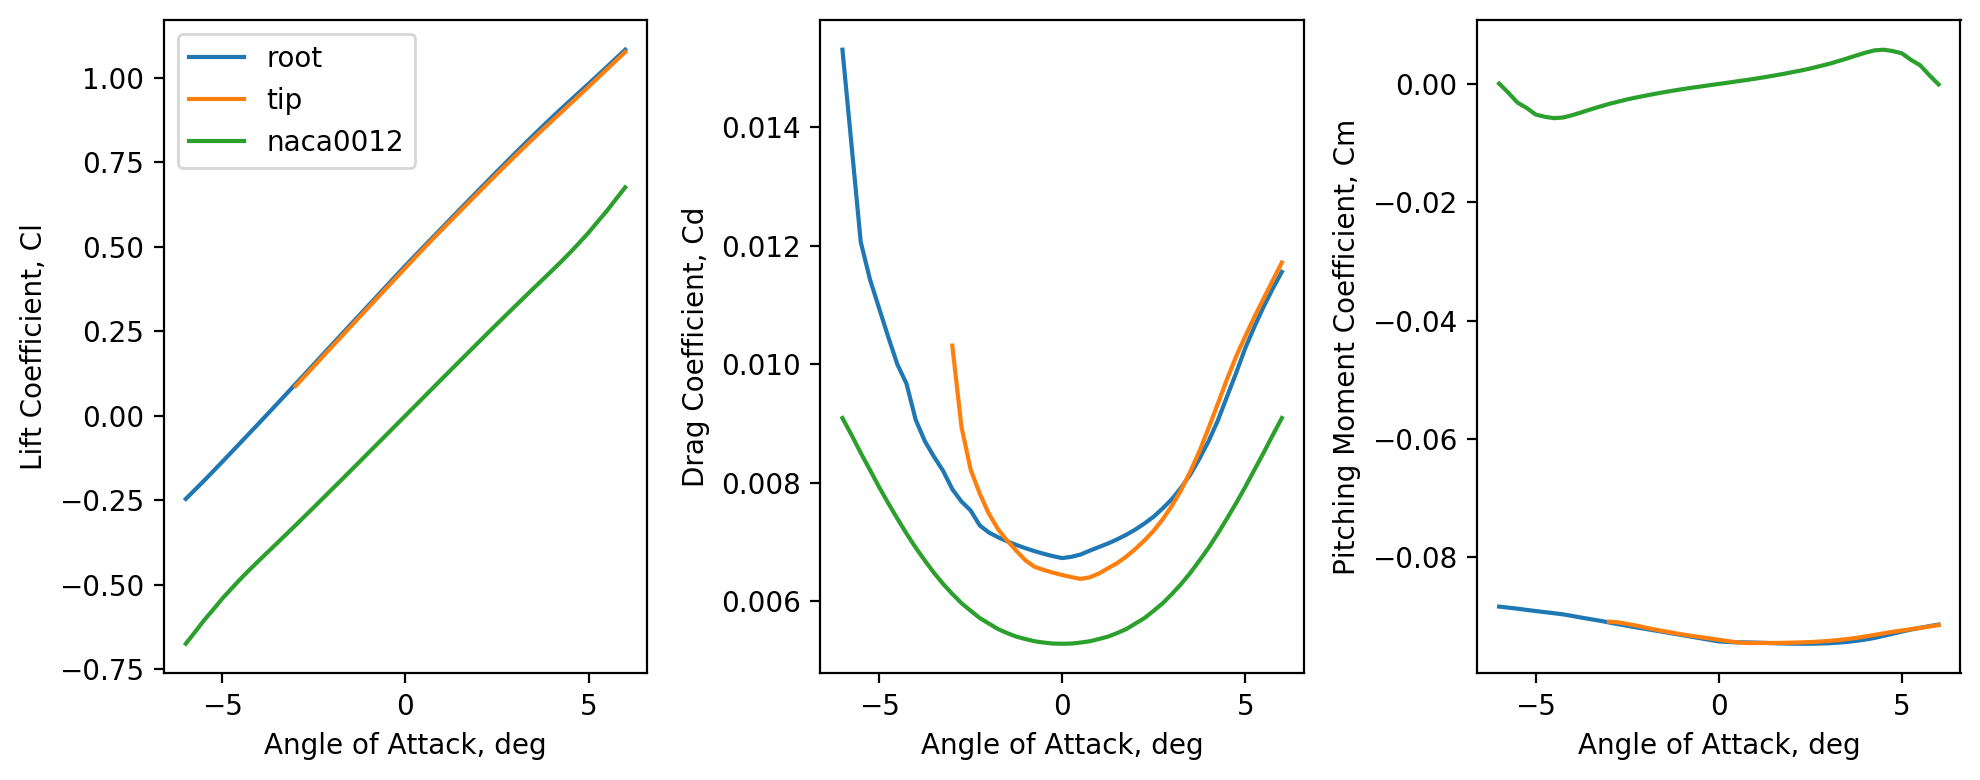

In [7]:
for ith, polar in enumerate(polar_data):
#     fig, ax = plot_polar(*load_polar(data_directory + polar['fname']), figsize=(10, 4))
#     fig.suptitle(polar['name'])
    lsargs = {'label': polar['name']}
    aoa_rad, cl, cd, cm = load_polar(data_directory + polar['fname'])
    if ith == 0:
        fig, ax = plot_polar(aoa_rad, cl, cd, cm, figsize=(10, 4), lsargs=lsargs)
    else:
        fig, ax = plot_polar(aoa_rad, cl, cd, cm, figax=(fig, ax), lsargs=lsargs)
    print(f'(viscous) Zero-lift angle of attack {get_alpha_cl0(aoa_rad * 180 / np.pi, cl)(0):.4f} deg')
ax[0].legend()

# FlexOp Aircraft Polars

## Convergence on polar data - UVLM only

In [8]:
cases = []

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 12160 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 20, n_elem = 4, 46080 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W20n4'}})

cases.append({'filename': 'seq_flexop_w10n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 4, 23040 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W10n4'}})

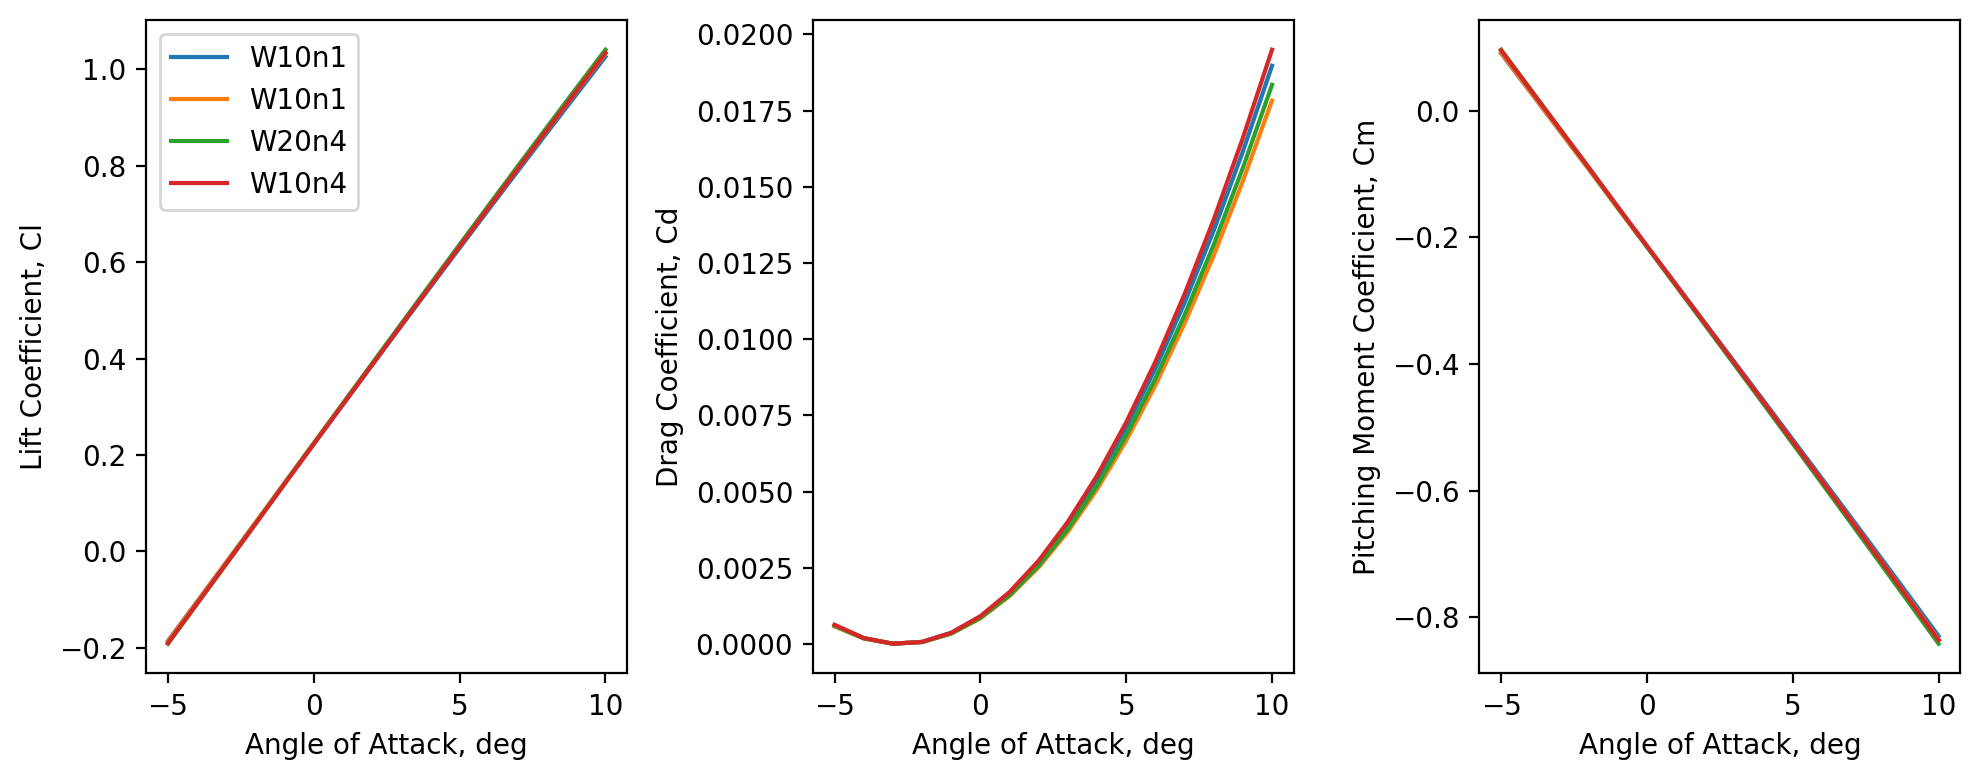

In [9]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

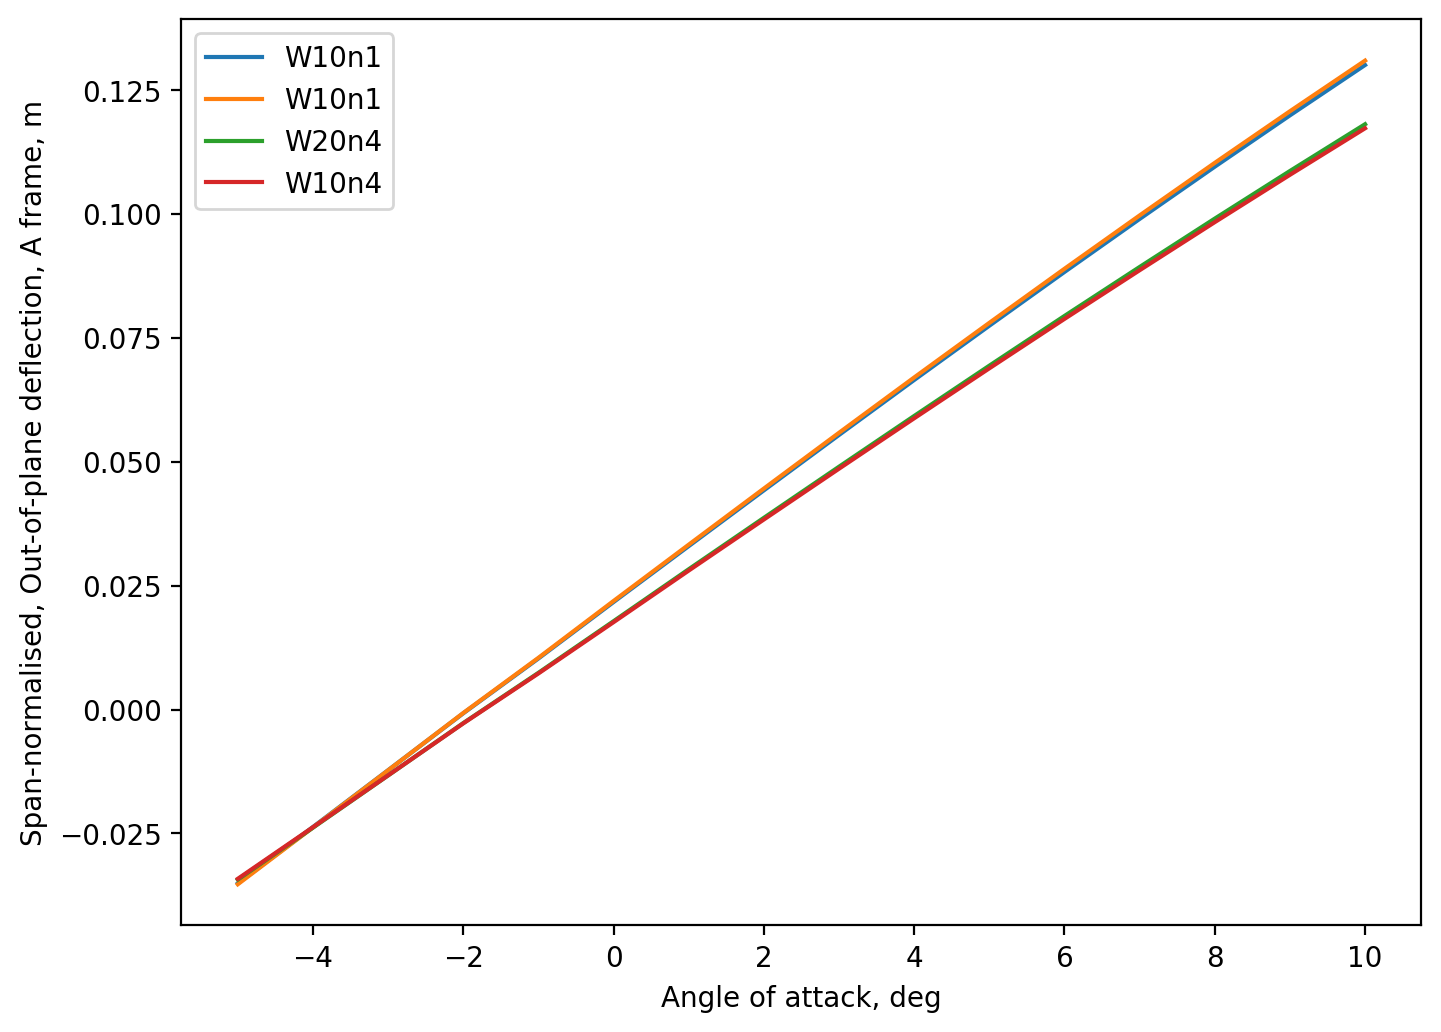

In [10]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

## Convergence on aircraft polar data with polar corrections

In [11]:
cases = []

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 12160 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p1_f0.dat',
              'rmk': 'wake length 20, n_elem = 4, 46080 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W20n4'}})

cases.append({'filename': 'seq_flexop_w10n4_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 4, 23040 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W10n4'}})

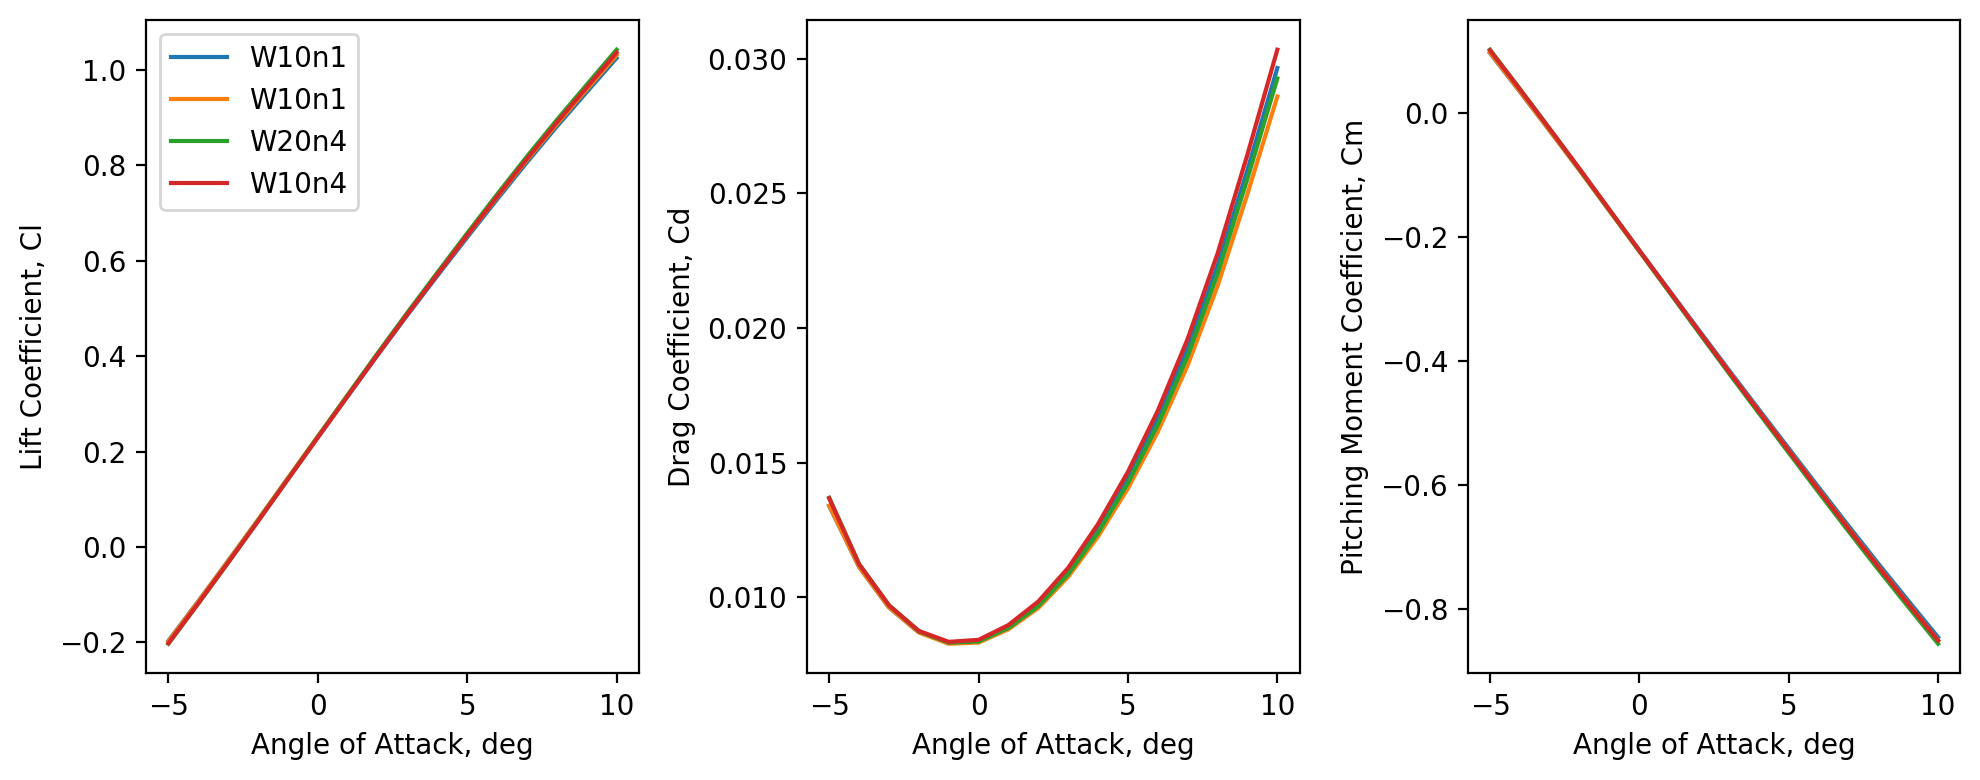

In [12]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

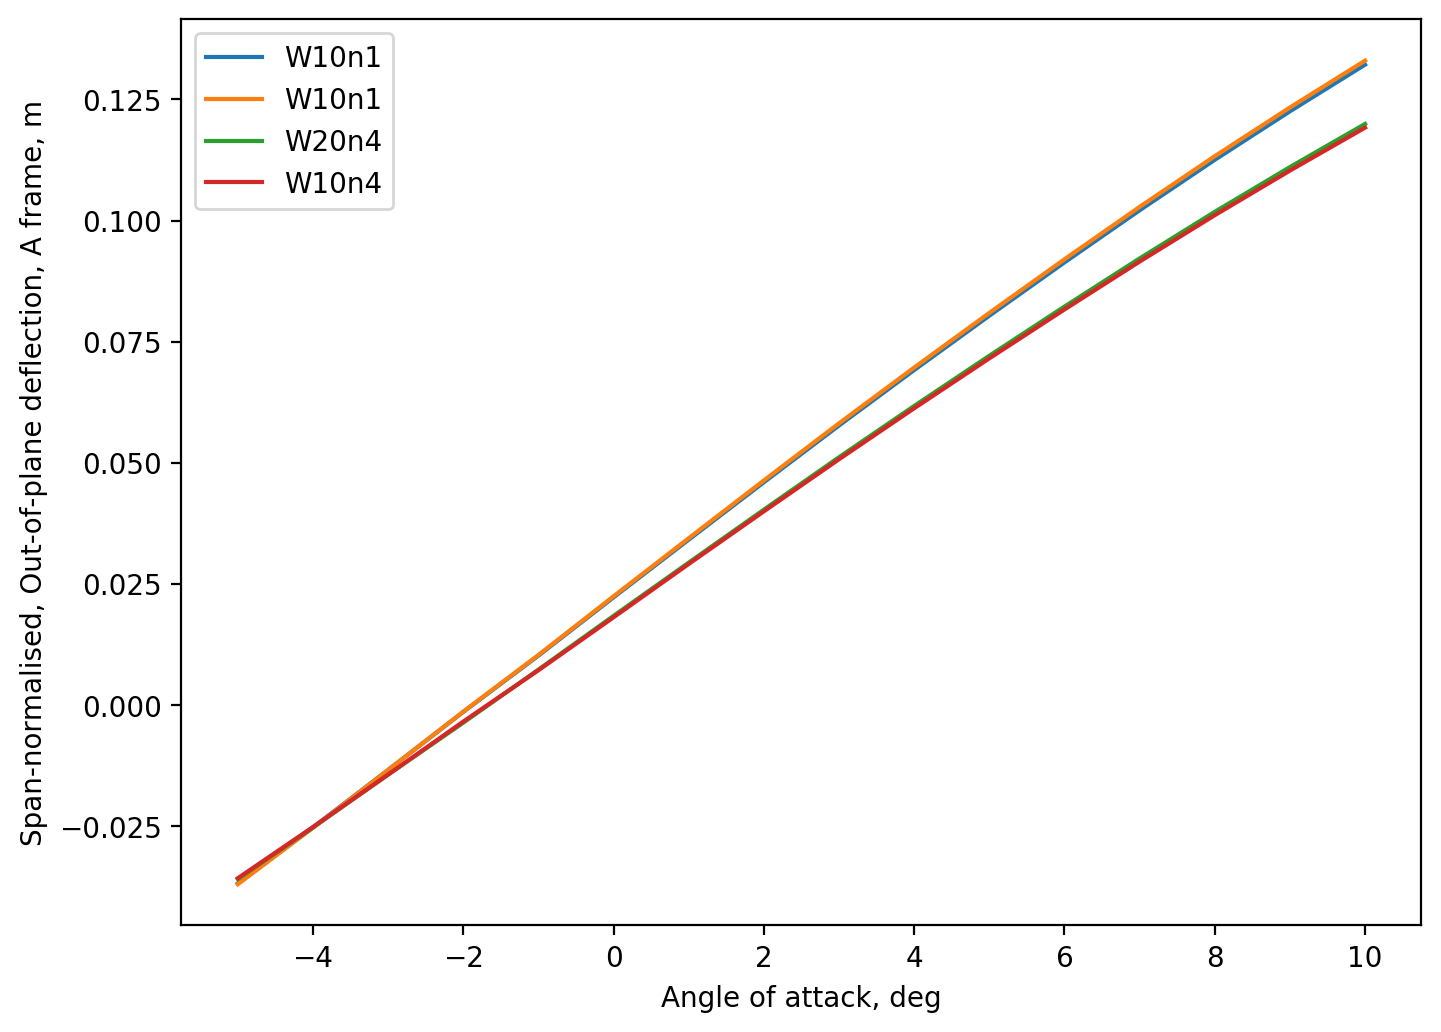

In [13]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

# Polars and UVLM comparison - W10 N1

In [14]:
cases = []

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'UVLM'}})

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars'}})

cases.append({'filename': 'seq_flexop_rigid_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars rigid'}})

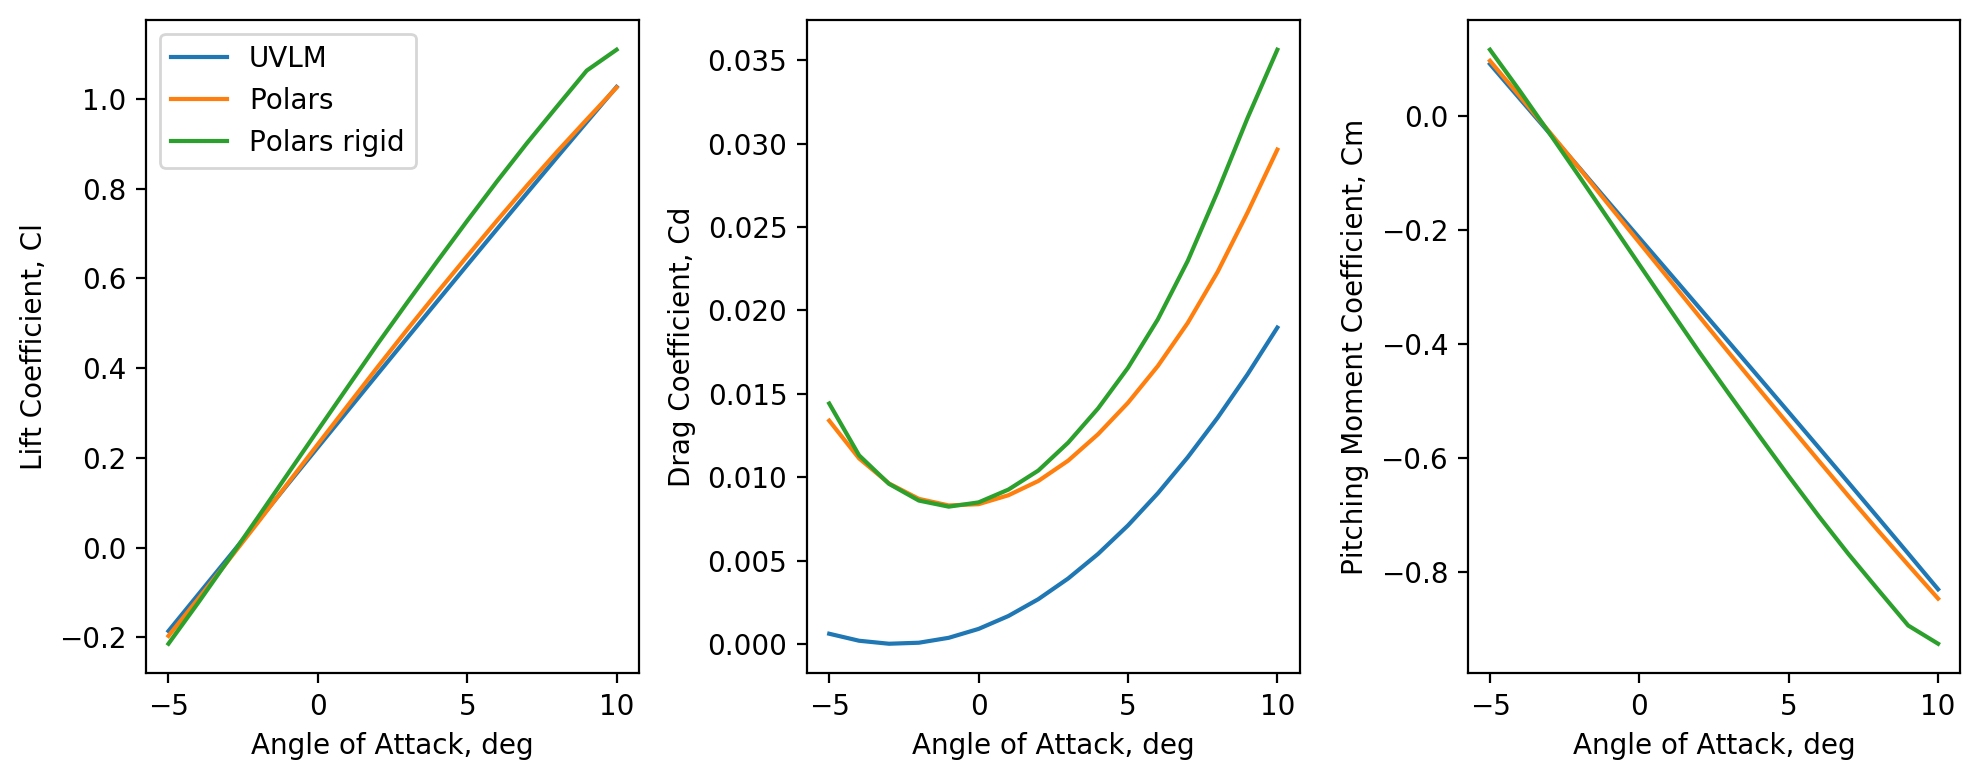

In [15]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

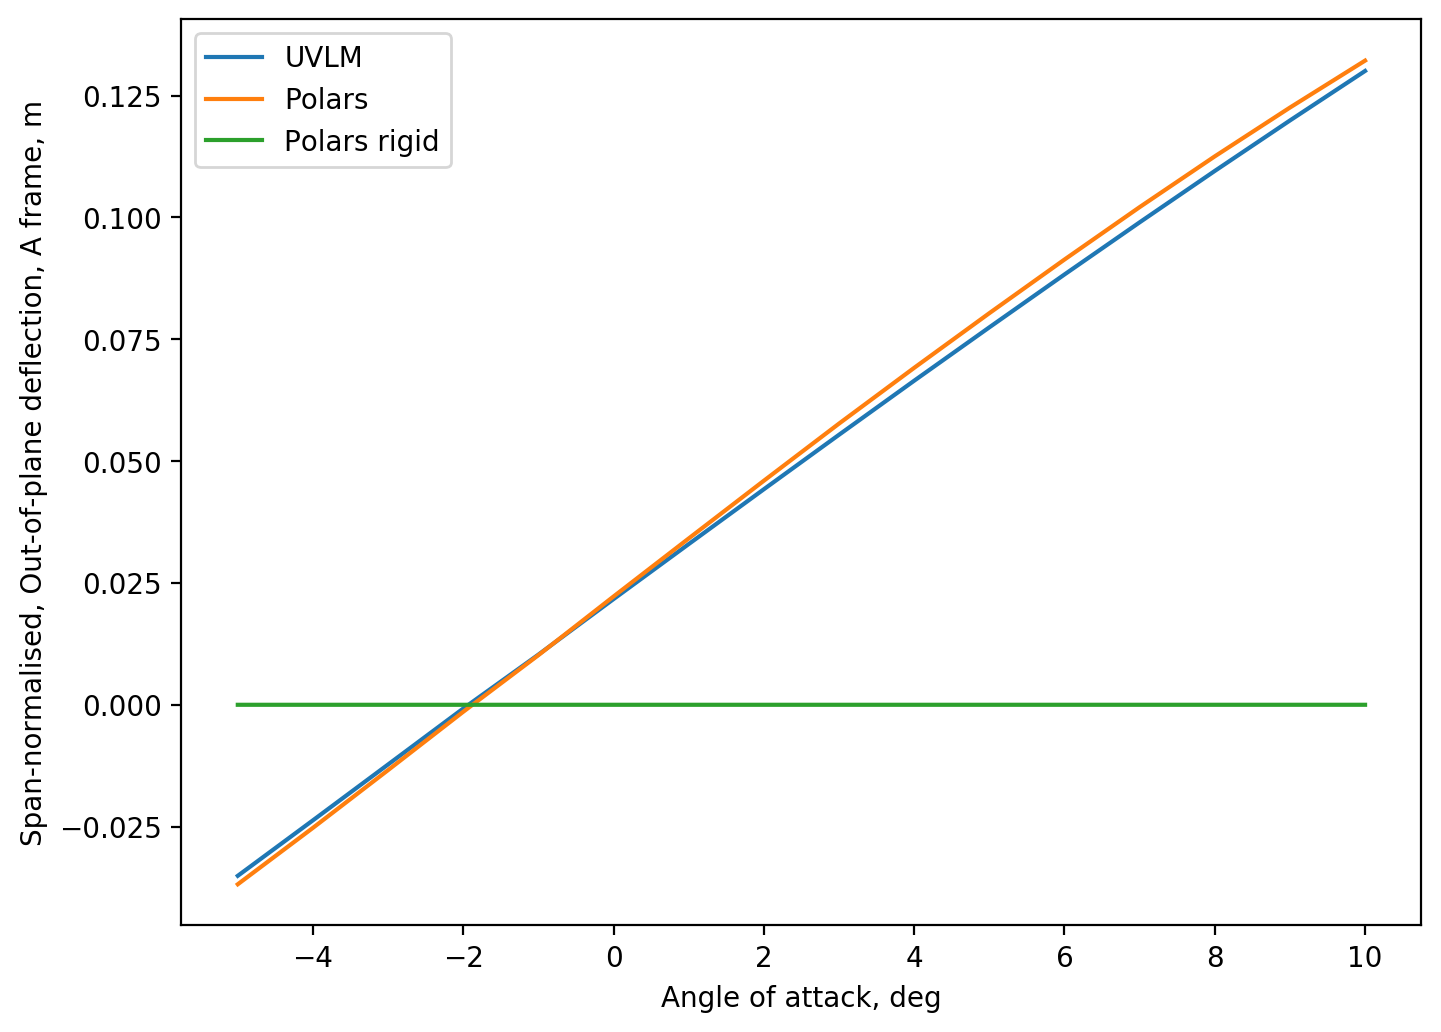

In [16]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

# Polars and UVLM comparison - W20 N4

In [17]:
cases = []

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'UVLM'}})

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars'}})

cases.append({'filename': 'seq_flexop_rigid_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars rigid'}})

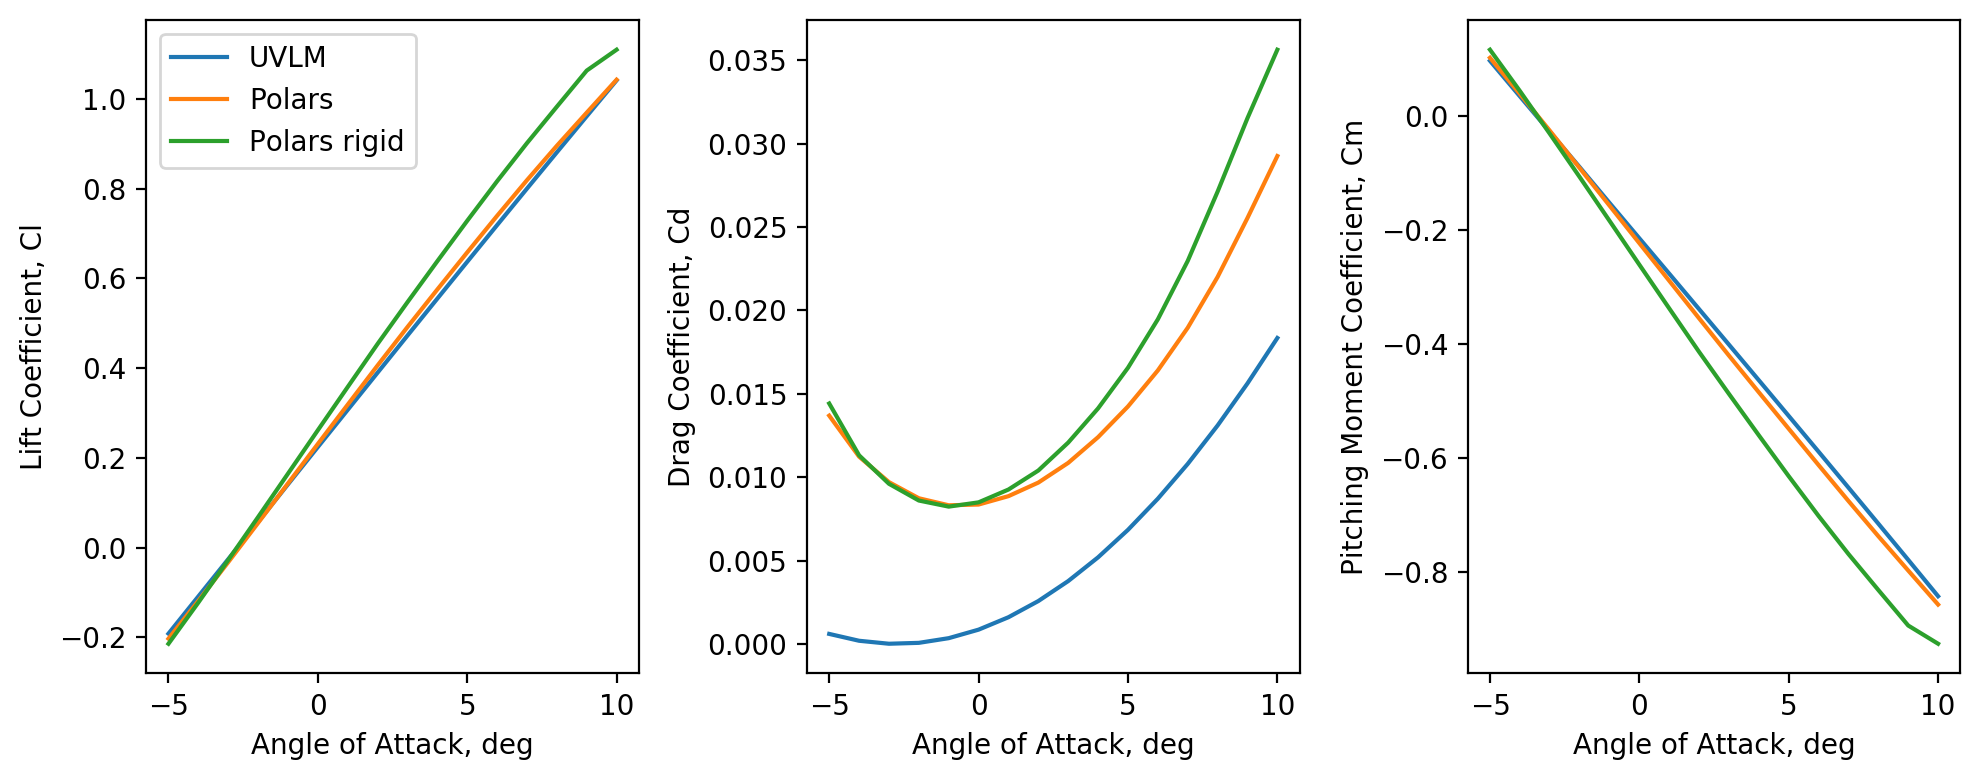

In [18]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, A frame, m')

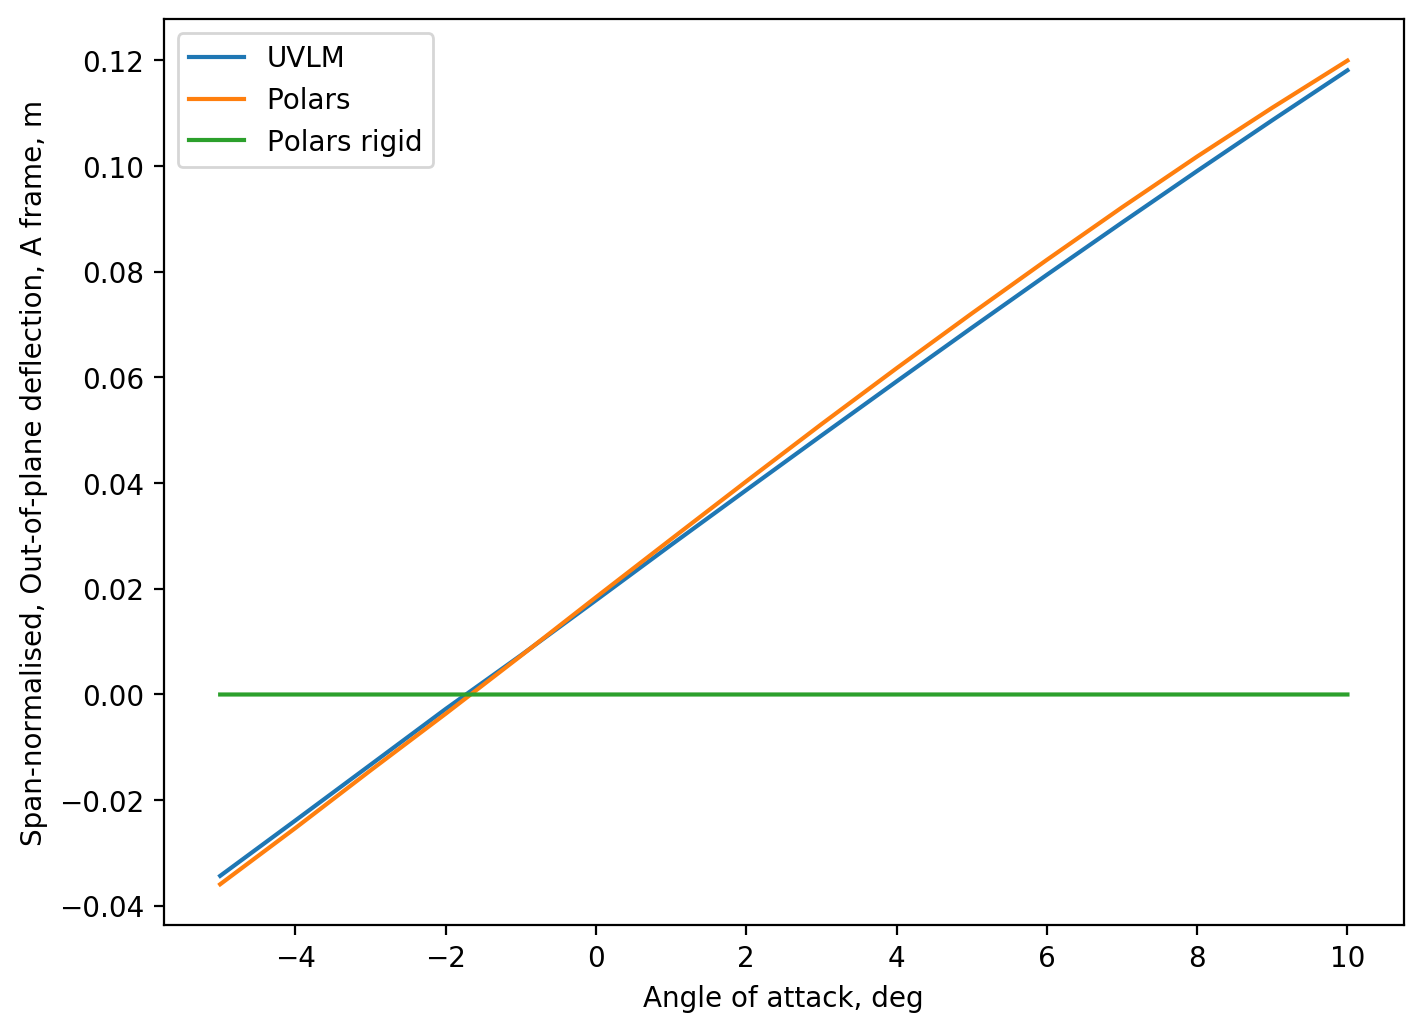

In [19]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, A frame, m')

# Zero-lift angle of attack because of camber analysis

In [20]:
def load_airfoil_data_from_file(source_directory):
    file = source_directory + "/camber_line_airfoils.csv"
    camber_line = pd.read_csv(file, sep = ";")
    return np.array(camber_line.iloc[:,0]), np.array(camber_line.iloc[:,1])

In [21]:
source_directory = '../src/flex_op/aeroelastic_properties/'
camber_line = load_airfoil_data_from_file(source_directory)

In [22]:
# Recreate panelling as in aerogrid
airfoil_db = (scipy.interpolate.interp1d(camber_line[0],
                               camber_line[1],
                               kind='quadratic',
                               copy=False,
                               fill_value='extrapolate',
                               assume_sorted=True))

In [23]:
m = 500
panels_x = np.linspace(0, 1, m + 1)
panels_z = airfoil_db(panels_x)

In [24]:
# Get alpha_CL0
from sharpy.utils import generate_cases
alpha_0_cl_fine = generate_cases.get_aoacl0_from_camber(camber_line[0], camber_line[1])
alpha_0_cl_panel = generate_cases.get_aoacl0_from_camber(panels_x, panels_z)

print('Refined camber line alpha_0_cl: {:.4f} deg'.format(alpha_0_cl_fine * 180 / np.pi))
print('Panelled camber line alpha_0_cl: {:.4f} deg'.format(alpha_0_cl_panel * 180 / np.pi))

Refined camber line alpha_0_cl: -3.8538 deg
Panelled camber line alpha_0_cl: -3.8542 deg


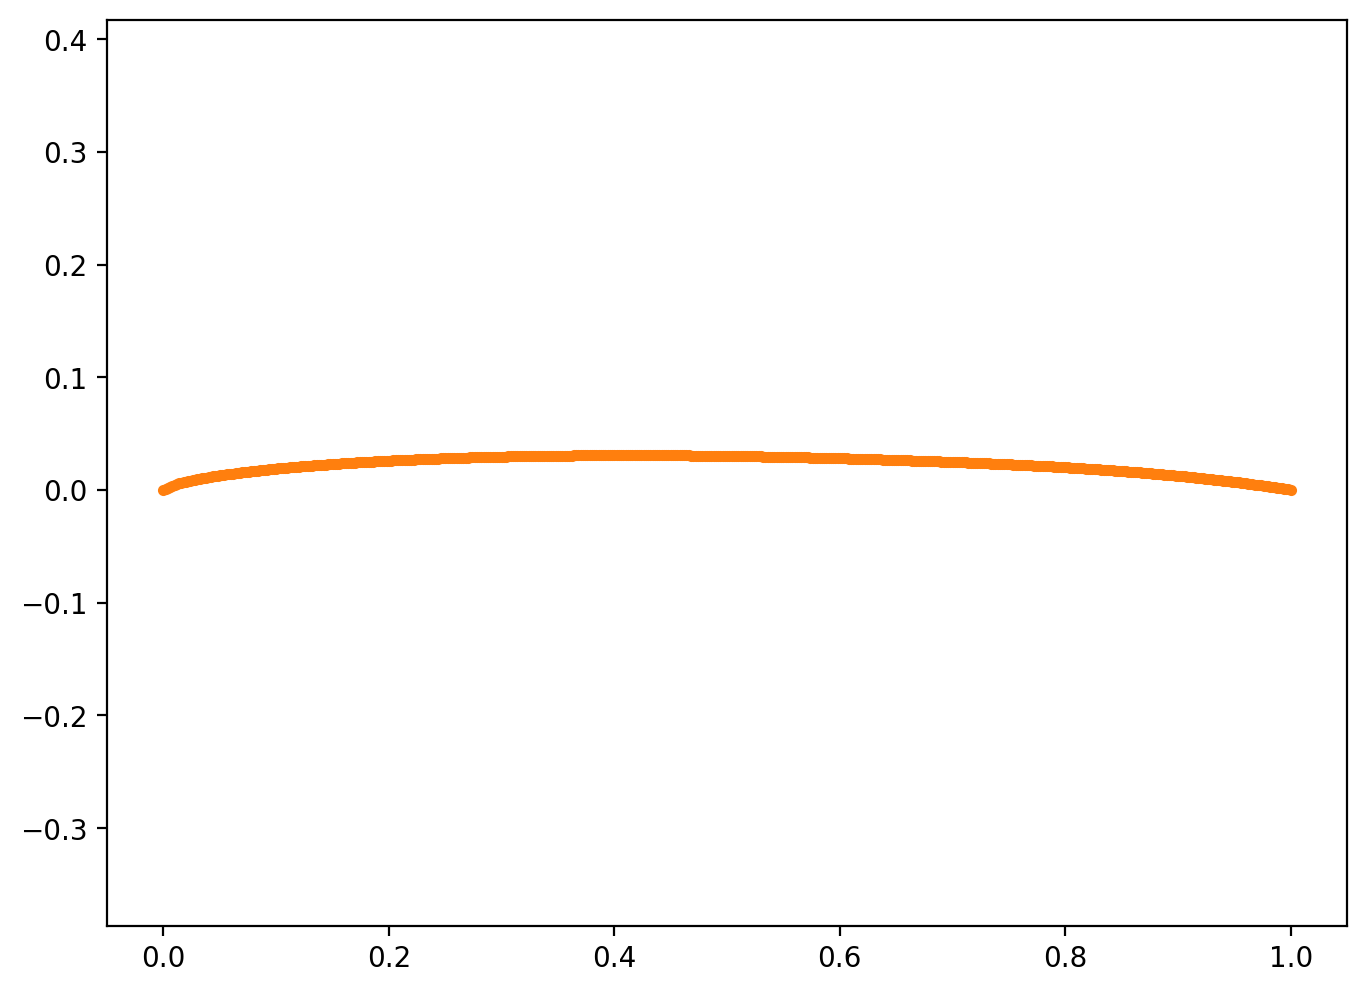

In [25]:
plt.plot(camber_line[0], camber_line[1])
plt.plot(panels_x, panels_z, marker='o', ms=3)
plt.axis('equal');

In [26]:
len(camber_line[0])

500

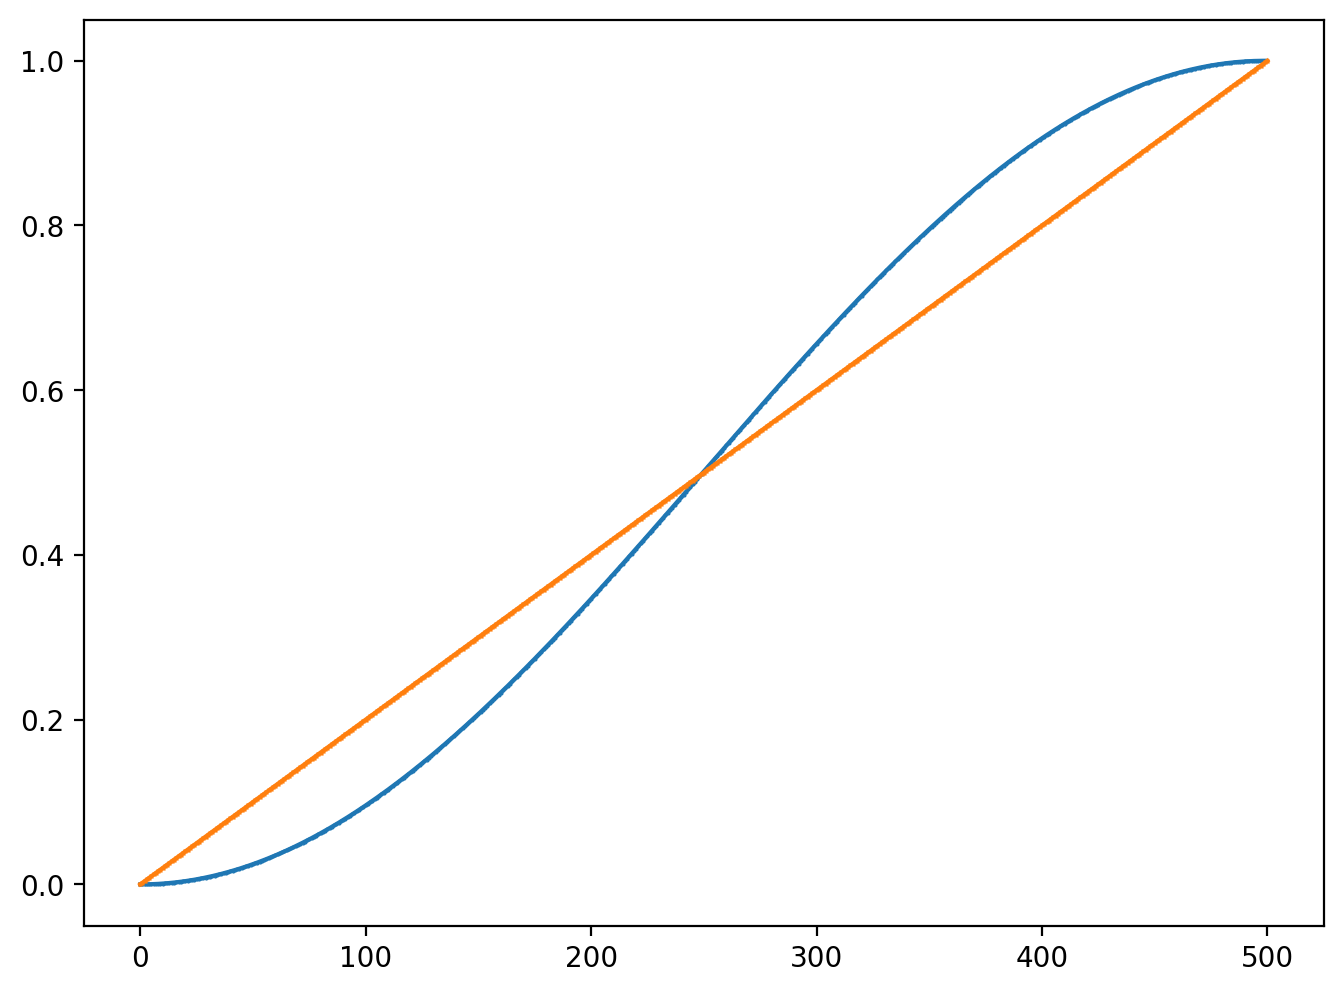

In [27]:
plt.plot(range(500), camber_line[0], marker='o', ms=.5)
plt.plot(range(len(panels_x)), panels_x, marker='s', ms=.5)

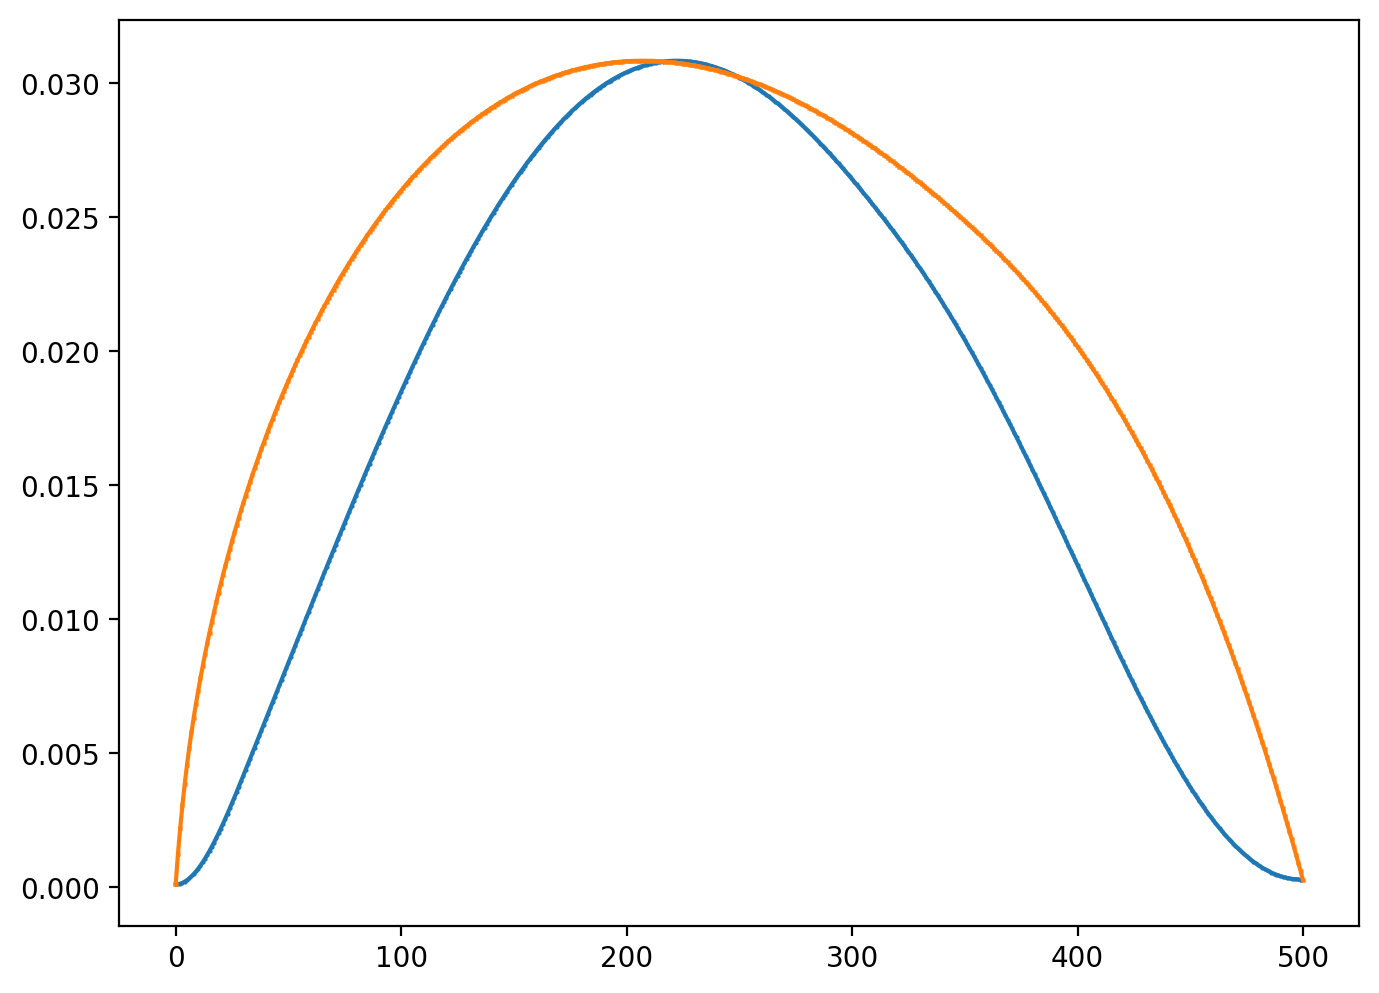

In [28]:
plt.plot(range(500), camber_line[1], marker='o', ms=.51)
plt.plot(range(len(panels_z)), panels_z, marker='s', ms=.51)